In [2]:
import pandas as pd 
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score 

data = pd.read_csv('./data.csv')

# Splitting
training = data.head(50000)
testing = data.tail(5000)
holdout_set = training.sample(5000, random_state=1)         # pick 5000 observations randomly
training = training.drop(holdout_set.index) # Remove holdout from training data

# Build a classifier
classifier = DummyClassifier(strategy='most_frequent')
classifier.fit(training.drop('Genre',axis=1), training['Genre'])

# Estimate accuracy
pred = classifier.predict(holdout_set.drop('Genre',axis=1))
estimated_accuracy = accuracy_score(holdout_set['Genre'], pred)
pd.Series(estimated_accuracy).to_csv('ea.csv', index=False, header=False) 

# Predict testing set
pred = classifier.predict(holdout_set.drop('Genre',axis=1))
pred = pd.Series(pred).to_csv('pred.csv', index=False, header=False)

data   

,Lyric,Genre
0,"Handy dandy, controversy surrounds him. He bee...",Rock
1,"Same bed, but it feels just a little bit bigge...",Rock
2,Saw ya out by the pool on the 8th of July. Did...,Pop
3,Got my shit down super tight. Got my shit down...,Hip Hop
4,[talk:]. Ay soulja boy in da buildin. Ay i wan...,Hip Hop
...,...,...
54995,I can't believe what you did to me. Down on my...,unknown
54996,Have all the songs been written?. Have all the...,unknown
54997,Everything you do you do so right. The clothes...,unknown
54998,(trecho). (Rule Number Two. Understanding what...,unknown


<AxesSubplot:ylabel='Genre'>

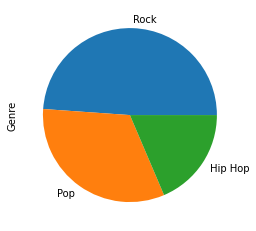

In [8]:
training['Genre'].value_counts().plot.pie()

In [75]:
pd.set_option('display.max_colwidth', 70)
testing.sample(5)

,Lyric,Genre
50059,Lonely moonlight guides my eyes right to the door. So many nights ...,unknown
53272,One of these nights you wait and see. One of these nights you're g...,unknown
52656,I know I could lie but I'm telling the truth. Wherever I go there'...,unknown
53965,Don’t let it go away. This feeling has got to stay. Don’t let it g...,unknown
54612,I've tried everything. Everything. Everything. To feel something. ...,unknown
